In [1]:
import warnings

# Specify the warning categories as classes
# warning_categories = (DeprecationWarning, FutureWarning)

# Ignore the specified warning categories from the pandas module
warnings.filterwarnings("ignore", category=DeprecationWarning, module="pandas")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import os 
import sys 

In [3]:
# Check the current working directory
print(os.getcwd())
# print(sys.path)

c:\Users\Ramal\Documents\Python\Data Analysis\Spotify\Spotify Most Streamed


In [4]:
spotify_most_streamed = pd.read_csv("spotify_most_streamed.csv")
spotify_most_streamed.fillna(0, inplace=True)

# Spliting Artist and Title column into artist and title columns

In [6]:
split_data = spotify_most_streamed['Artist and Title'].str.split(" - ", n=1, expand=True)

# Check if the split result contains two elements
if len(split_data.columns) == 2:
    # Assign the split columns to the original DataFrame
    spotify_most_streamed[['Artist', 'Title']] = split_data
else:
    # Handle the case where there are more or fewer elements
    spotify_most_streamed['Artist'] = 'Various Artists'
    spotify_most_streamed['Title'] = spotify_most_streamed['Artist and Title']

spotify_most_streamed = spotify_most_streamed[['Artist', 'Title', 'Streams', 'Daily']]

# Rename columns 
spotify_most_streamed = spotify_most_streamed.rename(columns={"Artist": "artist", "Title": "title", "Streams":"song_total_streams", "Daily":"song_daily_streams"})

# Remove commas between numbers and convert to numeric

In [8]:
# Remove commas from the 'Streams' and 'Daily' columns
spotify_most_streamed[['song_total_streams', 'song_daily_streams']] = spotify_most_streamed[['song_total_streams', 'song_daily_streams']].applymap(lambda x: str(x).replace(',', ''))

# Convert the 'Streams' and 'Daily' columns to numeric
spotify_most_streamed[['song_total_streams', 'song_daily_streams']] = spotify_most_streamed[['song_total_streams', 'song_daily_streams']].apply(pd.to_numeric)

C:\Users\Ramal\AppData\Local\Temp\ipykernel_11040\3994825333.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  spotify_most_streamed[['song_total_streams', 'song_daily_streams']] = spotify_most_streamed[['song_total_streams', 'song_daily_streams']].applymap(lambda x: str(x).replace(',', ''))


# Grouping by artist and sum total streams 

In [10]:
artists_with_most_streams_df = spotify_most_streamed.groupby('artist')['song_total_streams'].sum().sort_values(ascending=False).reset_index(name= 'artist_total_streams').head(10)
artists_with_most_streams_df

,artist,artist_total_streams
0,Drake,29633804177
1,The Weeknd,28939761191
2,Ed Sheeran,28774547398
3,Bad Bunny,28665586274
4,Taylor Swift,26186296710
5,Post Malone,24604040715
6,Billie Eilish,22831647986
7,Ariana Grande,20655534759
8,Eminem,19013189172
9,Maroon 5,17324160771


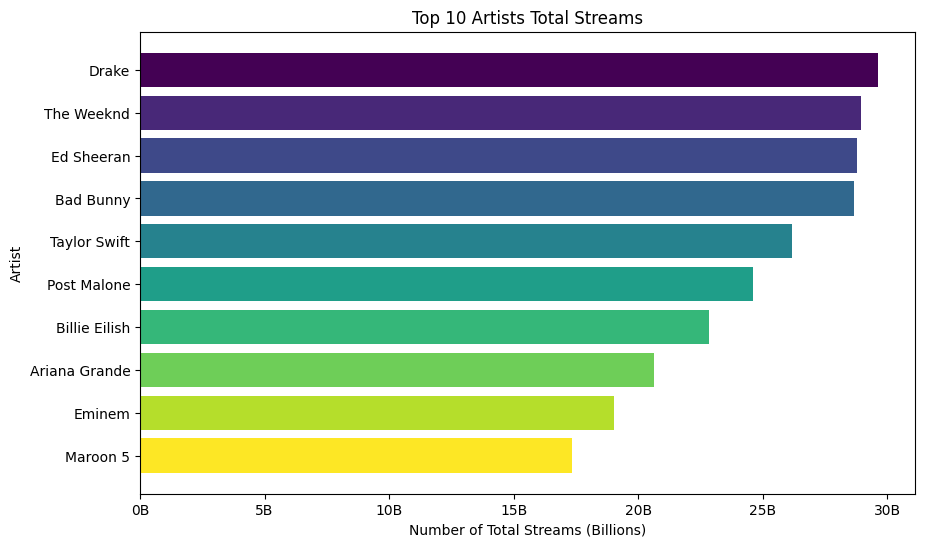

In [11]:
# Function to format the y-axis labels to billions
def billions(x, pos):
    return '%1.0fB' % (x * 1e-9)

formatter = FuncFormatter(billions)

# Generate colors
colors = plt.cm.viridis(np.linspace(0, 1, len(artists_with_most_streams_df)))

# Plot top 10 artists
plt.figure(figsize=(10, 6))
plt.barh(artists_with_most_streams_df['artist'], artists_with_most_streams_df['artist_total_streams'], color=colors)
plt.title('Top 10 Artists Total Streams')
plt.xlabel('Number of Total Streams (Billions)')
plt.ylabel('Artist')
plt.gca().invert_yaxis()  # To display the highest value at the top

# Format x-axis to show numbers in millions
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

# Grouping by artist and sum daily streams 

In [13]:
artists_with_most_daily_streams_df = spotify_most_streamed.groupby('artist')['song_daily_streams'].sum().sort_values(ascending=False).reset_index(name='artist_total_daily_streams').head(10)
artists_with_most_daily_streams_df 

,artist,artist_total_daily_streams
0,Taylor Swift,39341219
1,The Weeknd,22689604
2,Bad Bunny,18883263
3,Drake,15947201
4,Bruno Mars,12393179
5,Eminem,11252393
6,Kanye West,11086791
7,Billie Eilish,10833630
8,Post Malone,10699362
9,Imagine Dragons,10341689


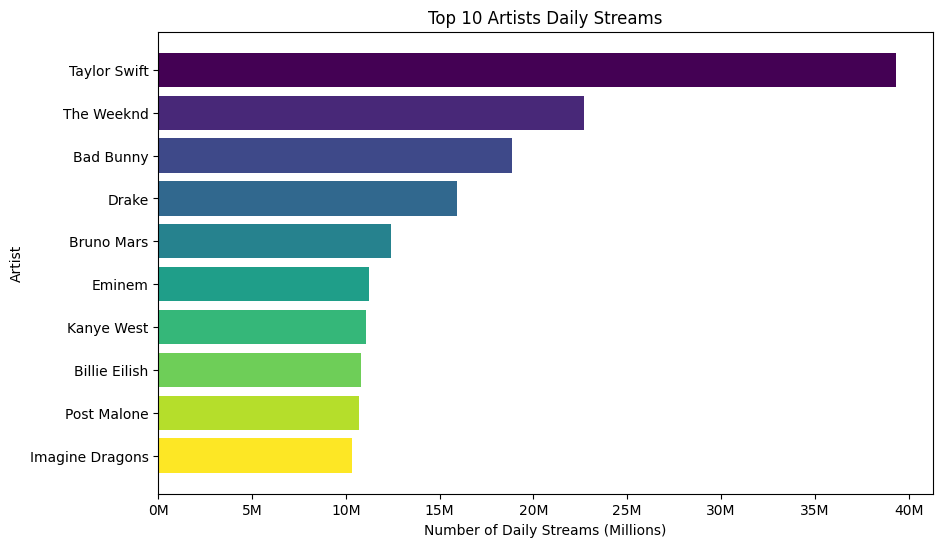

In [14]:
# Function to format the y-axis labels to millions
def millions(x, pos):
    return '%1.0fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Generate colors
colors = plt.cm.viridis(np.linspace(0, 1, len(artists_with_most_daily_streams_df)))

# Plot top 10 artists
plt.figure(figsize=(10, 6))
plt.barh(artists_with_most_daily_streams_df['artist'], artists_with_most_daily_streams_df['artist_total_daily_streams'], color=colors)
plt.title('Top 10 Artists Daily Streams')
plt.xlabel('Number of Daily Streams (Millions)')
plt.ylabel('Artist')
plt.gca().invert_yaxis()  # To display the highest value at the top

# Format x-axis to show numbers in millions
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

In [16]:
spotify_most_streamed['title'] = spotify_most_streamed['title'].fillna("Not Available")

# Average daily streams per song
spotify_most_streamed['avg_daily_streams'] = spotify_most_streamed['song_total_streams'] / spotify_most_streamed['song_daily_streams'].count()
avg_daily_streams = spotify_most_streamed.groupby('title')['avg_daily_streams'].mean().reset_index(name='avg_daily_streams').sort_values(by='avg_daily_streams',ascending=False).head(10)
avg_daily_streams

,title,avg_daily_streams
259,Blinding Lights,1.513594e+06
1710,Shape of You,1.446660e+06
1791,Someone You Loved,1.183550e+06
456,Dance Monkey,1.158410e+06
1436,One Dance,1.108219e+06
2368,rockstar,1.105523e+06
1648,STAY,1.095273e+06
1813,Starboy,1.063420e+06
222,Believer,1.061958e+06
148,As It Was,1.058853e+06


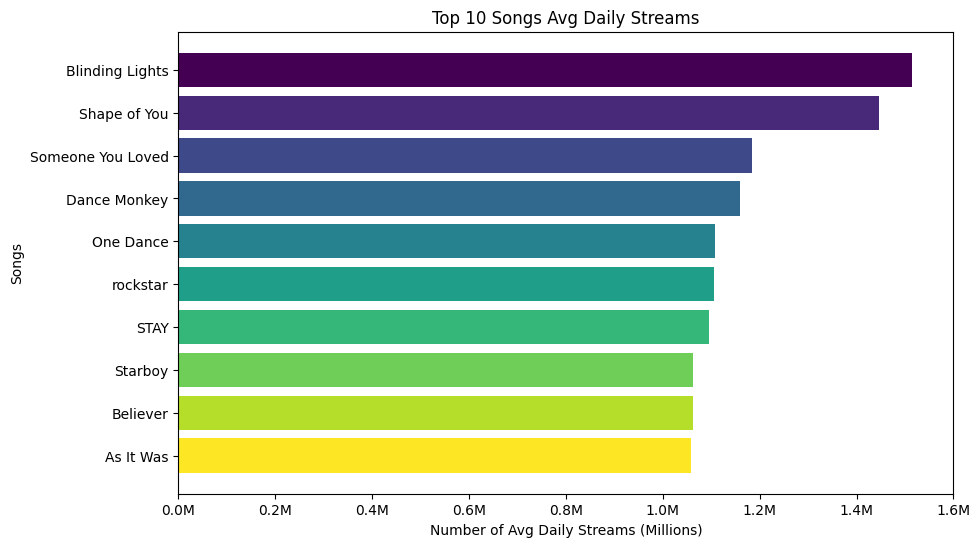

In [19]:
# Function to format the y-axis labels to millions
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Generate colors
colors = plt.cm.viridis(np.linspace(0, 1, len(avg_daily_streams)))

# Plot top 10 artists
plt.figure(figsize=(10, 6))
plt.barh(avg_daily_streams['title'], avg_daily_streams['avg_daily_streams'], color=colors)
plt.title('Top 10 Songs Avg Daily Streams')
plt.xlabel('Number of Avg Daily Streams (Millions)')
plt.ylabel('Songs')
plt.gca().invert_yaxis()  # To display the highest value at the top

# Format x-axis to show numbers in millions
plt.gca().xaxis.set_major_formatter(formatter)

# Set the x-axis range to fit the data more precisely
plt.xlim(0, 1600000)

plt.show()

# Top 100 songs 

In [21]:
top_100_songs = spotify_most_streamed.sort_values(ascending=False, by=['song_total_streams', 'song_daily_streams']).head(100)
top_100_songs.head(10)

,artist,title,song_total_streams,song_daily_streams,avg_daily_streams
0,The Weeknd,Blinding Lights,3783983806,1736378,1.513594e+06
1,Ed Sheeran,Shape of You,3616649759,1135140,1.446660e+06
2,Lewis Capaldi,Someone You Loved,2958875491,1522093,1.183550e+06
3,Post Malone,Sunflower,2898311408,1871177,1.159325e+06
4,Tones And I,Dance Monkey,2896024418,666818,1.158410e+06
5,Drake,One Dance,2770548672,1461772,1.108219e+06
6,Post Malone,rockstar,2763808309,821331,1.105523e+06
7,The Kid LAROI,STAY,2738183590,1490471,1.095273e+06
8,The Weeknd,Starboy,2658550411,2205639,1.063420e+06
9,Imagine Dragons,Believer,2654895028,1346642,1.061958e+06


In [22]:
top_10_artists_in_top_100_df = top_100_songs['artist'].value_counts().reset_index(name='number_of_songs_in_top_100').head(10)
top_10_artists_in_top_100_df 

,artist,number_of_songs_in_top_100
0,Ed Sheeran,5
1,Post Malone,5
2,The Weeknd,4
3,Shawn Mendes,4
4,The Chainsmokers,3
5,XXXTENTACION,3
6,Bruno Mars,3
7,Dua Lipa,3
8,Eminem,3
9,Imagine Dragons,3


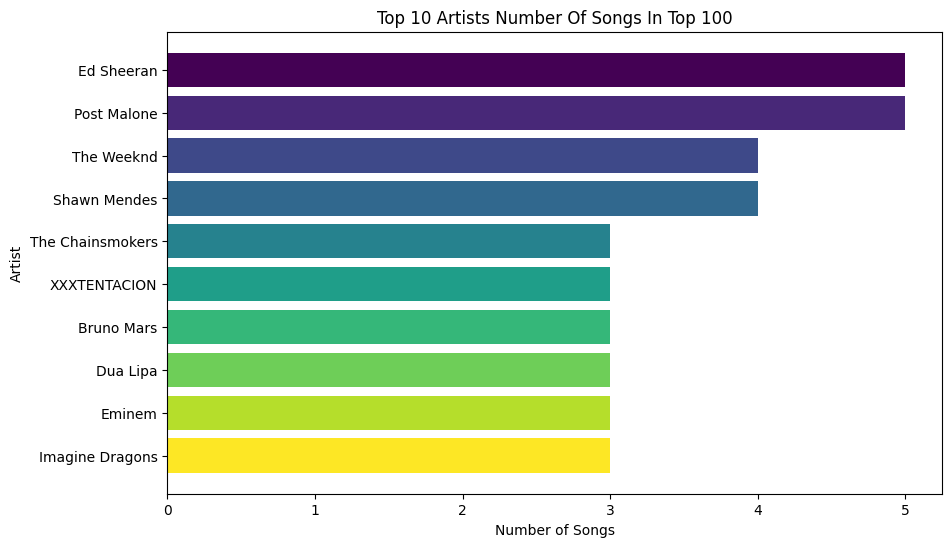

In [23]:
# Generate colors
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_artists_in_top_100_df)))

# Plot top 10 artists
plt.figure(figsize=(10, 6))
plt.barh(top_10_artists_in_top_100_df['artist'], top_10_artists_in_top_100_df['number_of_songs_in_top_100'], color=colors)
plt.title('Top 10 Artists Number Of Songs In Top 100')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()

# Top 200 songs 

In [25]:
top_200_songs = spotify_most_streamed.sort_values(ascending=False, by=['song_total_streams', 'song_daily_streams']).head(200)
top_10_artists_in_top_200_df = top_200_songs['artist'].value_counts().reset_index(name='number_of_songs_in_top_200').head(10)
top_10_artists_in_top_200_df

,artist,number_of_songs_in_top_200
0,The Weeknd,9
1,Post Malone,8
2,Ed Sheeran,6
3,XXXTENTACION,5
4,Billie Eilish,4
5,Bruno Mars,4
6,Eminem,4
7,Adele,4
8,Justin Bieber,4
9,Queen,4


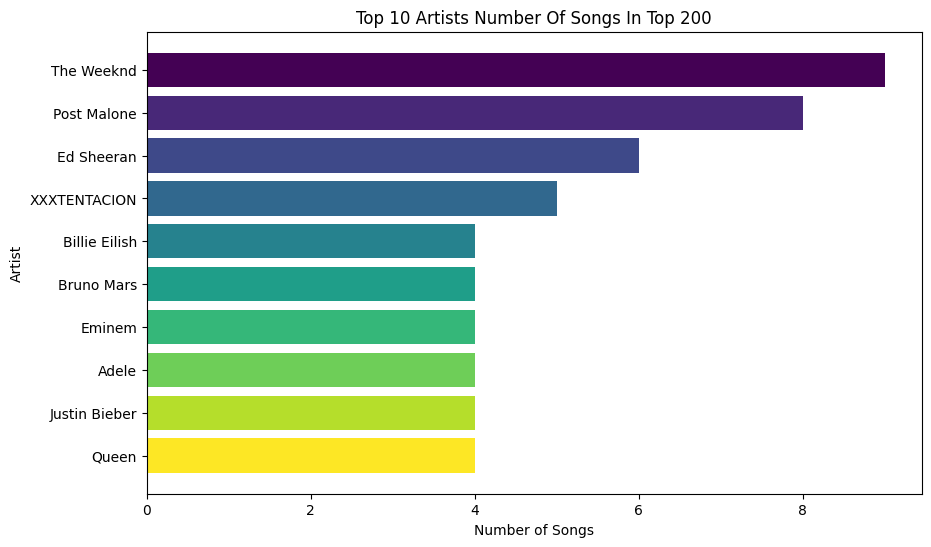

In [26]:
# Generate colors
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_artists_in_top_200_df)))

# Plot top 10 artists
plt.figure(figsize=(10, 6))
plt.barh(top_10_artists_in_top_200_df['artist'], top_10_artists_in_top_200_df['number_of_songs_in_top_200'], color=colors)
plt.title('Top 10 Artists Number Of Songs In Top 200')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()

In [28]:
# Artists with most songs in both top 100 and 200 
#  - The Weekend, Post Malone, XXXTENTACION and Ed Sheeran 

# Drake has more streams combined with one song in top 10 most streamed songs, 
# also he's in the top 10 artists with most daily streams but he's not in the top 10 artists with most songs in both top 100 and 200 


# Is there a correlation between song daily streams and total streams?
# The correlation between song daily streams and total streams is 70%, not all artists exist in both categories 

# Artists like Drake have all time most streams with few song in the top 10 most streams in both top 100 and 200 song 
# One of the reason can be that he releases more music than other artist 
# And other artists like The Weekend have more songs in the top 10, most daily streams because they release quality music    